<a href="https://colab.research.google.com/github/Kashaf-Zia06/Python-AI-Bootcamp/blob/main/Logistic_Regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Titanic Dataset
---
**Goal:** Learn Logistic Regression by predicting survival of Titanic passengers.

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Step 2: Load Titanic Dataset

In [2]:
!unzip titanicData.zip -d "/content/sample"

Archive:  titanicData.zip
  inflating: /content/sample/Titanic-Dataset.csv  


In [3]:
df=pd.read_csv("/content/sample/Titanic-Dataset.csv")

In [4]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 3: Data Preprocessing

In [5]:
df = df[['Survived','Pclass','Sex','Age','Fare']]
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)
X = df.drop('Survived', axis=1)
y = df['Survived']
#X.head()
y.head()

/tmp/ipython-input-199211860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Survived
0,0
1,1
2,1
3,1
4,0


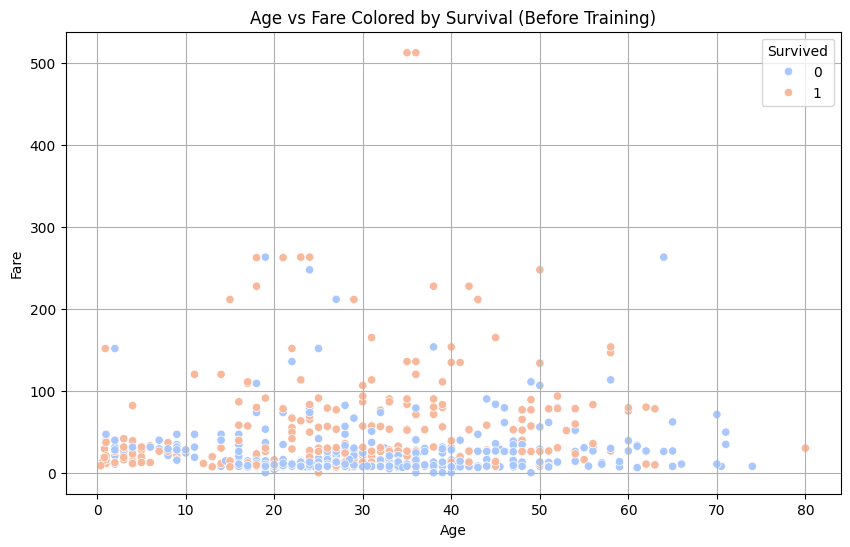

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived',data = df, palette='coolwarm')
plt.title('Age vs Fare Colored by Survival (Before Training)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

## Step 4: Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((571, 4), (143, 4))

## Step 5: Train Logistic Regression Model

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7902097902097902

## Step 6: Evaluation

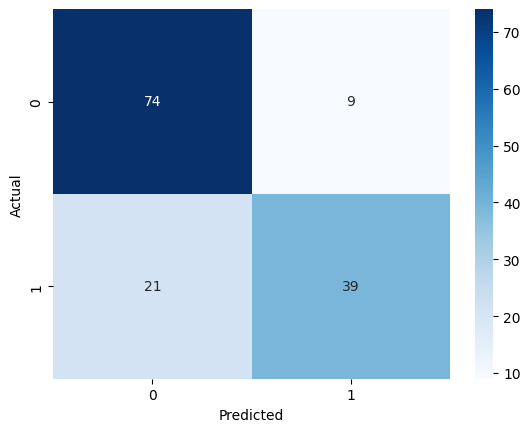

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        83
           1       0.81      0.65      0.72        60

    accuracy                           0.79       143
   macro avg       0.80      0.77      0.78       143
weighted avg       0.79      0.79      0.79       143



In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))